# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
#To begin analysis, first import pandas and other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#load data file into a dataframe
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# First check the data frame to get some basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


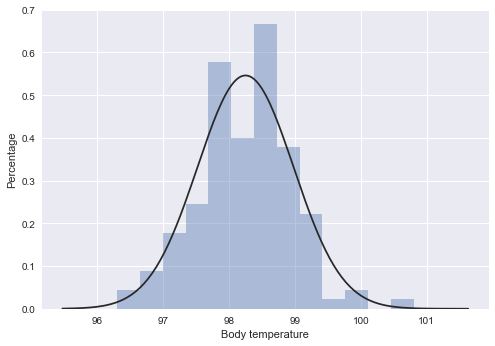

In [43]:
# Question #1: is the distribution of the body temperature normal?
#First let's put a normal distribution fit on the histogram of the body temperatures
temp=df['temperature']
sns.distplot(temp, kde=False, fit=stats.norm)
plt.xlabel('Body temperature')
plt.ylabel('Percentage')
plt.show()

It looks pretty 'normal' but we can further test by plotting ECDF of the data with that simulated using a random number generator for a normal distribution 
using mean and standard deviation generated from the data

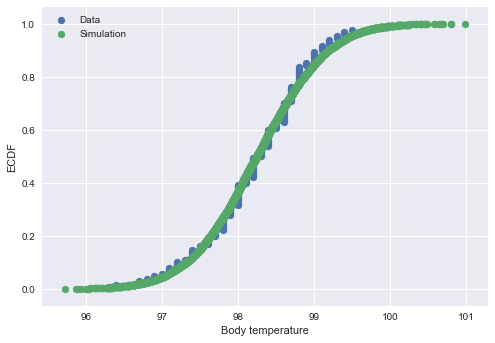

In [44]:
def ecdf(a):
    """This function takes an array as the argument,
        and returns the x, y coordinates for plotting
        an ECDF"""
    x=np.sort(a)
    y=np.arange(1, len(a)+1)/len(a)
    return(x,y)

#calculate x, y for the actual body temperature data
x,y=ecdf(temp)
#calculate theoretical x_theo, y_theo for the generated normal distribution data
temp_mean=np.mean(temp)
temp_std=np.std(temp)
x_theo, y_theo=ecdf(np.random.normal(temp_mean, temp_std, 10000))
#plot ECDF for actual data
plt.scatter(x,y, label='Data')
#plot ECDF for generated normal distribution data
plt.scatter(x_theo, y_theo, label='Simulation')
#label the axes
plt.xlabel('Body temperature')
plt.ylabel('ECDF')
#add a legend
plt.legend()
#show the graph
plt.show()

They overlap very well, so I think the temperature is a normal distribution

Question 2: Is the sample size large? Are the observations independent?
    
The sample size is fairly large since there are 130 observations. To test whether the observations are independent. We could divide the 130 observations 
into two groups and test correlation. we can even do a permutation test and see whether it's significant.

First define a function to compute pearson correlation coefficient

In [6]:
def pearson_r(a1, a2):
    """The function takes two arrays (a1,a2) as argument,
        computes a pearson coefficient matrix, and then return
        the pearson correlation coefficient between the two arrays"""
    cor_matrix=np.corrcoef(a1,a2)
    cor=cor_matrix[0,1]
    return(cor)

#divide the 130 temperature observations into 2 groups
temp_group_1=temp[: 65]
temp_group_2=temp[65:]
#compute pearson correlation coefficient of the two groups
corr=pearson_r(temp_group_1, temp_group_2)
print(corr)


-0.150161089723


In [7]:
#this shows very weak anti-correlation
#we can then do a permutation and then compute again
temp_perm=np.random.permutation(temp)
temp_perm_1=temp_perm[:65]
temp_perm_2=temp_perm[65:]
corr_perm=pearson_r(temp_perm_1, temp_perm_2)
print(corr_perm)


0.0579360500799


Again, no obivous correlation(or anti-correlation). We can then use for loops to simulate this process say 10000 times and then compute the correlation 
coefficient for all the permutations. Wethen plot a distribution of all the coefficients to see how they spread out.

Initiate an empty array to hold all coefficients

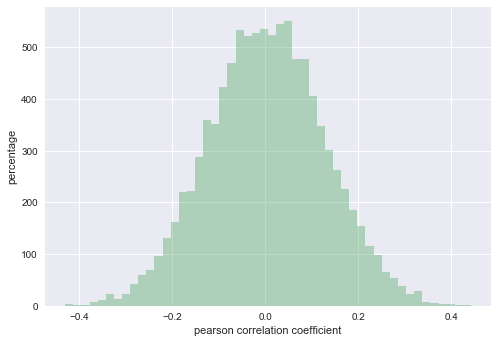

In [10]:
corr_perm_rep=np.empty(10000)
for i in range(10000):
    temp_perm_rep=np.random.permutation(temp)
    corr_perm=pearson_r(temp_perm_rep[:65], temp_perm_rep[65:])
    corr_perm_rep[i]=corr_perm
sns.distplot(corr_perm_rep, kde=False)
plt.xlabel('pearson correlation coefficient')
plt.ylabel('percentage')
plt.show()

From the above histogram, we can see that the pearson correlation coefficients
generated from simulation lie around 0 which indicates there is no correlation
So answer the second part of the second question, the data points are indeed
independent.

Question 3: Is the true population mean really 98.6?
Would you use a one sample test or two sample test? Why?
Answer: I would use a one sample test, since we only know the population mean
but not the data and we are comparing our data to a single value. A one sample test
is reasonable.
In this situation, is it appropriate to use the t or z statistic?
Answer, since we never learned z test or t test, I will test this hypothesis using hack statistics
by doing bootstrapping of the sample data

In [10]:
#first shift the sample mean to the theoretical mean of 98.6. Our null hypothesis is:
#our sample mean is no different from 98.6
temp_new=temp-np.mean(temp)+98.6
#initiate empty array to store bootstrapped sample mean
temp_new_rep=np.empty(10000)
for i in range(10000):
    #do bootstrap to randomly select data from original sample
    temp_new_bs=np.random.choice(temp_new, len(temp_new))
    #then calculate the average which we will use as our test statistic
    temp_new_bs_mean=np.mean(temp_new_bs)
    temp_new_rep[i]=temp_new_bs_mean
#get our p values by summing all new mean values that are less than the original mean
p_val=np.sum(temp_new_rep<np.mean(temp_new))/10000
print('The p value is: ', p_val)

The p value is:  0.4927


Since the p value is pretty large, so we can safely accept our null hypothesis: our sample mean is really no different from 98.6

I will skip question #4 since it's asking about z and t tests again.

Question #5: at what level should we consider someone's temperature to be abnormal?
We can look at the 95% confidence level of our sample,  temperature outside the 95% confidence level can be considered abnormal

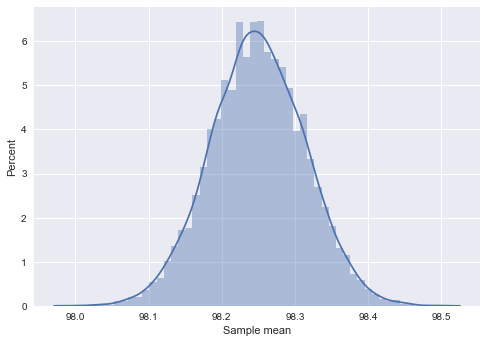

In [11]:
#let's do bootstrapping again with our original sample but without changing the mean
temp_bs_rep=np.empty(10000)
for i in range(10000):
    temp_bs=np.random.choice(temp, len(temp))
    temp_bs_mean=np.mean(temp_bs)
    temp_bs_rep[i]=temp_bs_mean
#first look at the distribution
sns.distplot(temp_bs_rep)
plt.xlabel('Sample mean')
plt.ylabel('Percent')
plt.show()

In [15]:
#Now show the 95% confidence intervals
conf_95=np.percentile(temp_bs_rep, [2.5, 97.5])
print('95% confidence intervals are: ', conf_95)

95% confidence intervals are:  [ 98.12307692  98.37461538]


For a data point to be abnormal, it is usually 2 or 3 standard deviations away from the mean. So we can use the 95% confidence interval and add 2 or 3 
standard deviations to the boundaries and see which values are outside that range

In [17]:
#Calcuate boundaries for 'normal values'
mean_plus_2stds=np.array([conf_95[0]-2*np.std(temp), conf_95[1]+2*np.std(temp)])
mean_plus_3stds=np.array([conf_95[0]-3*np.std(temp), conf_95[1]+3*np.std(temp)])
print('Normal range 1: ', mean_plus_2stds)
print('Normal range 2: ', mean_plus_3stds)

Normal range 1:  [ 96.66236137  99.83533094]
Normal range 2:  [  95.93200359  100.56568872]


We can then filter values that are outside each range to label them as 'abnormal'

In [30]:
abnormal_set_1=pd.concat([temp[temp<mean_plus_2stds[0]], temp[temp>mean_plus_2stds[1]]])
abnormal_set_2=pd.concat([temp[temp<mean_plus_3stds[0]], temp[temp>mean_plus_3stds[1]]])
print('Abnormal values set 1: ', abnormal_set_1.values)
print('Abnormal values set 2: ', abnormal_set_2.values)

Abnormal values set 1:  [  96.4   96.3  100.    99.9  100.8]
Abnormal values set 2:  [ 100.8]


The above values would be considered abnormal by their distance to the 95% confidence intervals of the sample mean

Question #6: Is there a significant difference between male and female in normal temperatures?
For this question, we will do a two sample test since we have one sample for each sex

In [42]:
#first get the two data sets out of the original data frame
male=df[df['gender']=='M']['temperature']
female=df[df['gender']=='F']['temperature']
#calculate their samples means and sample mean difference
diff_ori=np.mean(female)-np.mean(male)
print('male mean value: ', np.mean(male))
print('female mean value: ', np.mean(female))
print('Difference of the sample means: ', diff_ori)

male mean value:  98.1046153846154
female mean value:  98.39384615384613
Difference of the sample means:  0.289230769230727


Their means are very close. Let's look at their distribution

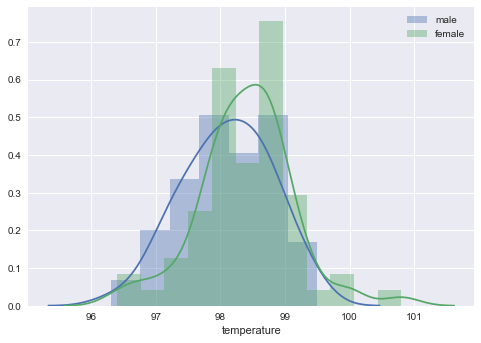

In [41]:
sns.distplot(male)
sns.distplot(female)
plt.legend(('male', 'female'))
plt.show()

The distributions look a little different. So to test whether male and female have different normal values,  our null hypothesis will be that male and female 
normal values are the same. The test will be a two sample test since we have data for each sample. 

We will do permutation of the combined data set and then randomly assign the first 65 values to male and the next 65 to female and then caculate the 
sample mean difference each time. The test statistic will be the sample mean difference. The p value will be the fraction of sample means generated 
greater than the original sample mean difference.

In [46]:
#initialize an array to hold all replicates of sample mean difference
diff_perm=np.empty(10000)
for i in range(10000):
    temp_perm=np.random.permutation(temp)
    temp_perm_male=temp_perm[:65]
    temp_perm_female=temp_perm[65:]
    temp_perm_diff=np.mean(temp_perm_female)-np.mean(temp_perm_male)
    diff_perm[i]=temp_perm_diff
p_val_2=np.sum(diff_perm[diff_perm>diff_ori])/10000
print('p value is: ', p_val_2)

p value is:  0.00417446153846


The p value is very small (<0.01) so we can safely reject our null hypothesis. This means that there is a difference between male and female body 
temperatures. They are not the same